In [259]:
# !pip install xgboost

In [260]:
# !pip install imbalanced-learn

In [261]:
# pip install pandas numpy matplotlib seaborn scikit-learn joblib streamlit


In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


In [263]:
file_path = r"D:\GUVI\Employee Project\Employee-Attrition - Employee-Attrition.csv"
df = pd.read_csv(file_path)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [264]:
df = df.drop(["EmployeeCount", "Over18", "StandardHours", "EmployeeNumber", ], axis=1, errors="ignore")

In [265]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [266]:
print(df.describe())

               Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.0

In [267]:
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


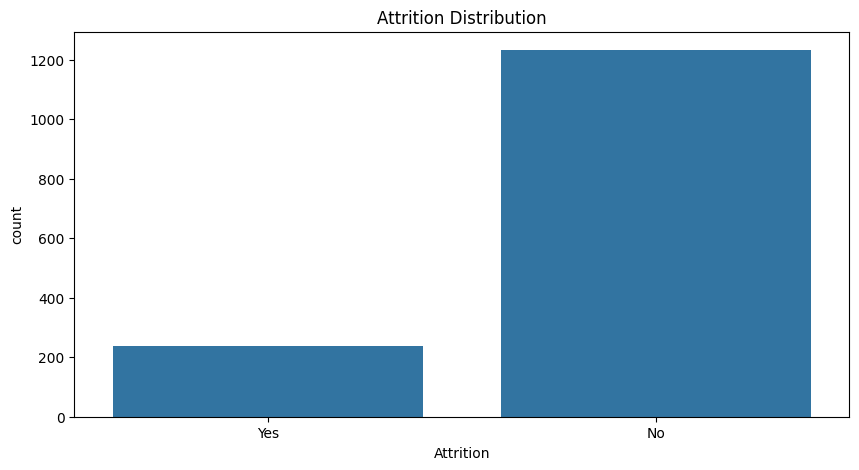

In [268]:
plt.figure(figsize=(10,5))
sns.countplot(x="Attrition", data=df)
plt.title("Attrition Distribution")
plt.show()

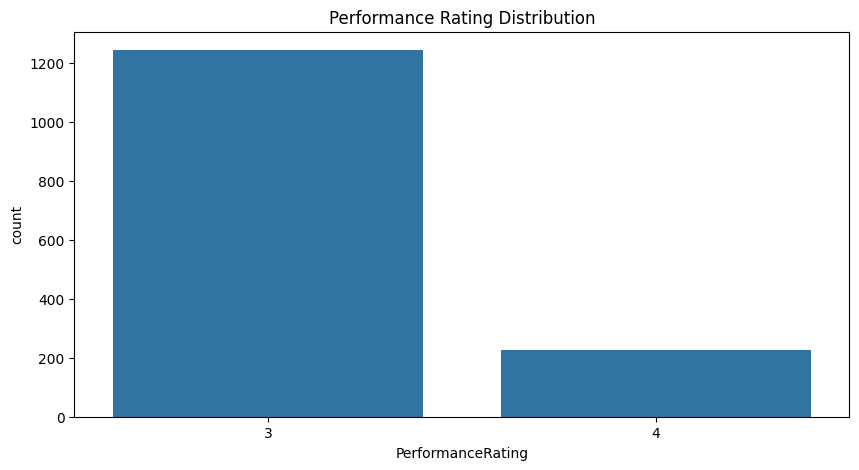

In [269]:
plt.figure(figsize=(10,5))
sns.countplot(x="PerformanceRating", data=df)
plt.title("Performance Rating Distribution")
plt.show()

In [270]:
label = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = label.fit_transform(df[col])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [271]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(["PerformanceRating", "Attrition"], axis=1))

X_scaled = pd.DataFrame(X_scaled, columns=df.drop(["PerformanceRating", "Attrition"], axis=1).columns)

**MODELS FOR ATTRITION**

In [272]:
X_attrition = df[["Age", "MonthlyIncome", "YearsAtCompany"]]
y_attrition = df["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X_attrition, y_attrition, test_size=0.2, random_state=42)


In [273]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [274]:
print("\nLogistic Regression - Attrition")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))



Logistic Regression - Attrition
Accuracy: 0.8673469387755102
Confusion Matrix:
 [[255   0]
 [ 39   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



c:\Users\Rajkumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Rajkumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Rajkumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

In [275]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [276]:
print("\nDecision Tree - Attrition")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree - Attrition
Accuracy: 0.7142857142857143
Confusion Matrix:
 [[205  50]
 [ 34   5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       255
           1       0.09      0.13      0.11        39

    accuracy                           0.71       294
   macro avg       0.47      0.47      0.47       294
weighted avg       0.76      0.71      0.73       294



In [277]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [278]:
print("\nRandom Forest - Attrition")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest - Attrition
Accuracy: 0.8299319727891157
Confusion Matrix:
 [[240  15]
 [ 35   4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91       255
           1       0.21      0.10      0.14        39

    accuracy                           0.83       294
   macro avg       0.54      0.52      0.52       294
weighted avg       0.78      0.83      0.80       294



**MODELS FOR PERFORMANCE RATING**

In [279]:
print("Performance Rating distribution:\n", df["PerformanceRating"].value_counts())

Performance Rating distribution:
 PerformanceRating
3    1244
4     226
Name: count, dtype: int64


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

In [281]:
selected_features = [
    "MonthlyIncome", "JobRole", "TotalWorkingYears", "HourlyRate", 
    "YearsAtCompany", "TrainingTimesLastYear", "MonthlyRate", "BusinessTravel", 
    "JobInvolvement", "WorkLifeBalance", "RelationshipSatisfaction", "Attrition", 
    "EnvironmentSatisfaction", "JobSatisfaction", "StockOptionLevel", "YearsSinceLastPromotion", "YearsWithCurrManager"
]

X_perf = df[selected_features]
y_perf = df["PerformanceRating"]

In [282]:
le = LabelEncoder()
X_perf["JobRole"] = le.fit_transform(X_perf["JobRole"])

C:\Users\Rajkumar\AppData\Local\Temp\ipykernel_6328\2177641259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_perf["JobRole"] = le.fit_transform(X_perf["JobRole"])


In [283]:
X_train, X_test, y_train, y_test = train_test_split(
    X_perf, y_perf, test_size=0.2, random_state=42, stratify=y_perf
)

In [284]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:\n", y_train_res.value_counts())

Class distribution after SMOTE:
 PerformanceRating
4    995
3    995
Name: count, dtype: int64


In [285]:
# Decision Tree tuning
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

dt_params = {
    "max_depth": [3, 5, 7, 10],
    "min_samples_split": [5, 10, 20],
    "min_samples_leaf": [2, 5, 10]
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(class_weight="balanced", random_state=42),
    param_grid=dt_params,
    cv=5,
    scoring="accuracy"
)

dt_grid.fit(X_train_res, y_train_res)
print("Best Params for Decision Tree:", dt_grid.best_params_)
print("Best CV Accuracy:", dt_grid.best_score_)

best_dt_model = dt_grid.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)
print(classification_report(y_test, y_pred_dt))


# Random Forest tuning
from sklearn.ensemble import RandomForestClassifier

rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [5, 8, 12],
    "min_samples_split": [5, 10, 20],
    "min_samples_leaf": [2, 5, 10],
    "max_features": ["sqrt", "log2"]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(class_weight="balanced", random_state=42),
    param_grid=rf_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

rf_grid.fit(X_train_res, y_train_res)
print("Best Params for Random Forest:", rf_grid.best_params_)
print("Best CV Accuracy:", rf_grid.best_score_)

best_rf_model = rf_grid.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))


Best Params for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best CV Accuracy: 0.7336683417085427
              precision    recall  f1-score   support

           3       0.86      0.78      0.82       249
           4       0.18      0.27      0.22        45

    accuracy                           0.70       294
   macro avg       0.52      0.52      0.52       294
weighted avg       0.75      0.70      0.73       294

Best Params for Random Forest: {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Accuracy: 0.8361809045226132
              precision    recall  f1-score   support

           3       0.86      0.89      0.87       249
           4       0.22      0.18      0.20        45

    accuracy                           0.78       294
   macro avg       0.54      0.53      0.53       294
weighted avg       0.76      0.78      0.77       294



In [286]:
# Logistic Regression
log_model_p = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
log_model_p.fit(X_train_res, y_train_res)
y_pred_log_p = log_model_p.predict(X_test)

c:\Users\Rajkumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [287]:
print("\nLogistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_p))
print(classification_report(y_test, y_pred_log_p))


Logistic Regression Performance:
Accuracy: 0.6020408163265306
              precision    recall  f1-score   support

           3       0.84      0.65      0.74       249
           4       0.14      0.31      0.19        45

    accuracy                           0.60       294
   macro avg       0.49      0.48      0.46       294
weighted avg       0.73      0.60      0.65       294



In [288]:
# Decision Tree
dt_model_p = DecisionTreeClassifier(class_weight="balanced", random_state=42)
dt_model_p.fit(X_train_res, y_train_res)
y_pred_dt_p = dt_model_p.predict(X_test)

In [289]:
print("\nDecision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_p))
print(classification_report(y_test, y_pred_dt_p))


Decision Tree Performance:
Accuracy: 0.6870748299319728
              precision    recall  f1-score   support

           3       0.86      0.75      0.80       249
           4       0.19      0.33      0.25        45

    accuracy                           0.69       294
   macro avg       0.53      0.54      0.52       294
weighted avg       0.76      0.69      0.72       294



In [290]:
# Random Forest
rf_model_p = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_model_p.fit(X_train_res, y_train_res)
y_pred_rf_p = rf_model_p.predict(X_test)

In [291]:
print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_p))
print(classification_report(y_test, y_pred_rf_p))


Random Forest Performance:
Accuracy: 0.7857142857142857
              precision    recall  f1-score   support

           3       0.85      0.90      0.88       249
           4       0.20      0.13      0.16        45

    accuracy                           0.79       294
   macro avg       0.53      0.52      0.52       294
weighted avg       0.75      0.79      0.77       294



In [293]:
import pickle

# Example: Assume you already trained models log_model, dt_model, rf_model for Attrition
# and log_model_p, dt_model_p, rf_model_p for PerformanceRating

# Save Attrition model (choose your best one, say RandomForest)
with open("attrition_model.pkl", "wb") as f:
    pickle.dump(log_model, f)

# Save Performance Rating model (say RandomForest again)
with open("performance_model.pkl", "wb") as f:
    pickle.dump(rf_model_p, f)
